In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
kigalitmp = pd.read_csv('KigaliTemp.csv') #whole dataset
tmpgitega = kigalitmp[['Year','TMP_Gitega']] #only for Gitega station 
tmpair = kigalitmp[['Year','TMP_Airport']] #only for Kigali Airport station 

In [3]:
kigalitmp.head()

,Year,TMP_Gitega,TMP_Airport
0,1981,32.0,32.4
1,1982,31.9,32.3
2,1983,31.5,32.2
3,1984,30.8,31.2
4,1985,30.9,29.8


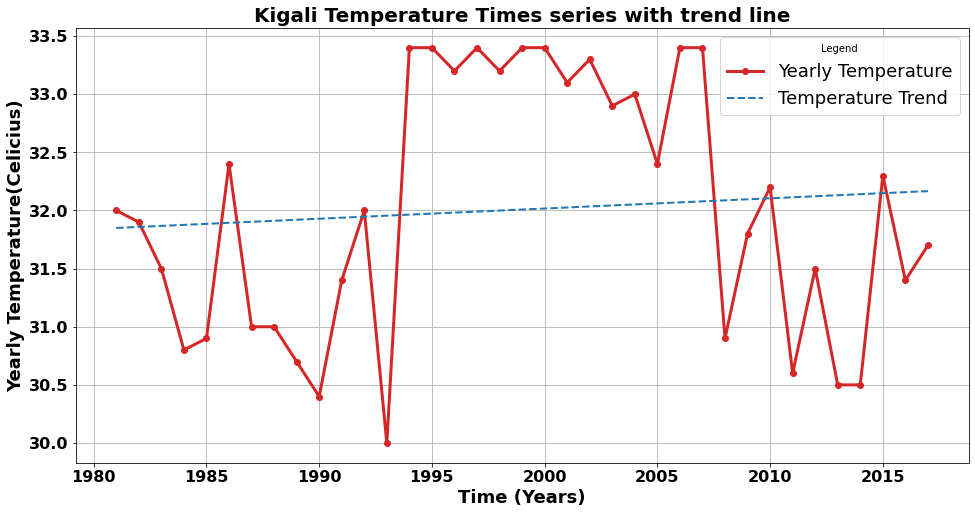

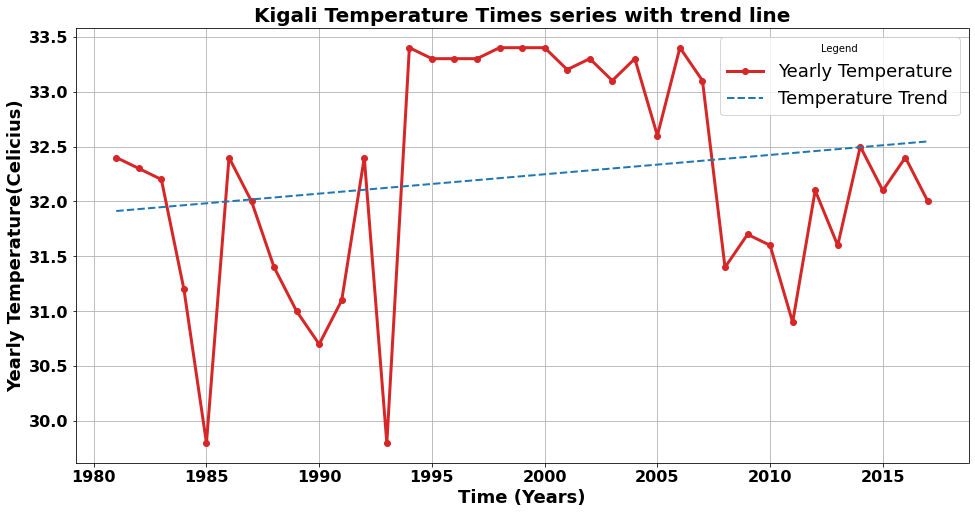

In [4]:
plt.figure(figsize=(16,8))
plt.title('Kigali Temperature Times series with trend line', fontsize=20,fontweight='bold')
plt.plot(tmpgitega['Year'],tmpgitega['TMP_Gitega'],color='tab:red',marker='o',linewidth=3.0,label='Yearly Temperature')
plt.grid(True)
x = np.arange(tmpgitega['Year'].size)
fit = np.polyfit(x, tmpgitega['TMP_Gitega'], deg=1)
fit_function = np.poly1d(fit)
plt.plot(tmpgitega['Year'], fit_function(x),'--',color='tab:blue',linewidth=2.0,label='Temperature Trend')
plt.xlabel('Time (Years)', fontsize=18,fontweight='bold')
plt.ylabel("Yearly Temperature(Celicius)", fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold')
#plt.xlim(1960,2020)
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(title='Legend',fontsize=18)
plt.savefig('TmpGitega.png')
plt.show()
#Airport station
plt.figure(figsize=(16,8))
plt.title('Kigali Temperature Times series with trend line', fontsize=20,fontweight='bold')
plt.plot(tmpair['Year'],tmpair['TMP_Airport'],marker='o',color='tab:red',linewidth=3.0,label='Yearly Temperature')
plt.grid(True)
x = np.arange(tmpair['Year'].size)
fit = np.polyfit(x, tmpair['TMP_Airport'], deg=1)
fit_function = np.poly1d(fit)
plt.plot(tmpair['Year'], fit_function(x),'--', color='tab:blue',linewidth=2.0,label='Temperature Trend')
plt.xlabel('Time (Years)', fontsize=18,fontweight='bold')
plt.ylabel("Yearly Temperature(Celicius)", fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold')
#plt.xlim(1960,2020)
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(title='Legend',fontsize=18)
plt.savefig('TmpAirport.png')
plt.show()

In [5]:
#Read the dataset
data = pd.read_csv('KigaliTemp.csv',
                       index_col ='Year',
                       parse_dates = True)

In [6]:
data.head()

,TMP_Gitega,TMP_Airport
Year,,
1981-01-01,32.0,32.4
1982-01-01,31.9,32.3
1983-01-01,31.5,32.2
1984-01-01,30.8,31.2
1985-01-01,30.9,29.8


In [7]:
result = seasonal_decompose(data['TMP_Airport'], 
                            model ='multiplicative')# ETS decomposition

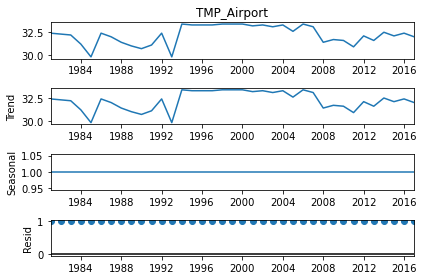

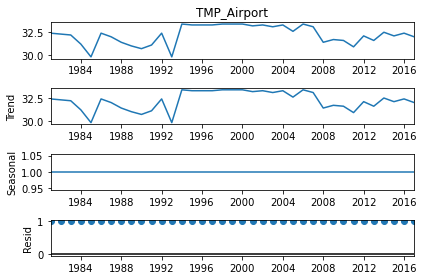

In [8]:
result.plot()

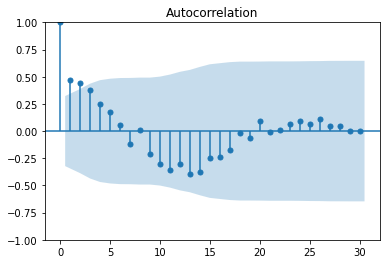

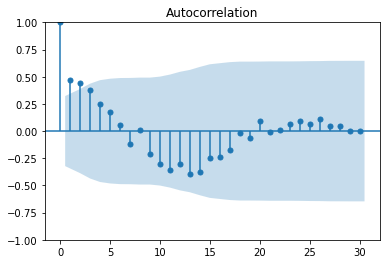

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data.TMP_Airport, lags =30)

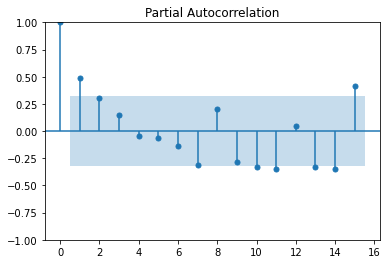

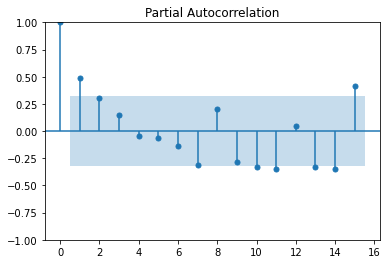

In [10]:
plot_pacf(data.TMP_Airport.squeeze(),lags=15)

In [11]:
#!pip install pmdarima
  
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(data['TMP_Airport'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=83.824, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=81.524, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=83.569, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=0.60 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.82 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=82.914, Time=0.03 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=83.204, Time=0.07 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=83.381, Time=0.10 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=81.666, Time=0.07 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=83.645, Time=0.22 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   : AIC=83.415, Time=0.07 sec


In [12]:
#Model fitting
# Split data into train / test sets
train = data.iloc[:len(data)-12]
test = data.iloc[len(data)-12:] # set one year(12 months) for testing
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['TMP_Airport'], 
                order = (1, 1, 0), 
                seasonal_order =(1, 1, 0, 12))
  
result = model.fit()
print(result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        TMP_Airport   No. Observations:                   25
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                 -21.268
Date:                            Tue, 04 Oct 2022   AIC                             48.535
Time:                                    15:18:40   BIC                             49.990
Sample:                                01-01-1981   HQIC                            47.997
                                     - 01-01-2005                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3939      0.316     -1.245      0.213      -1.014       0.226
ar.S.L12      -0.9954      2.748   

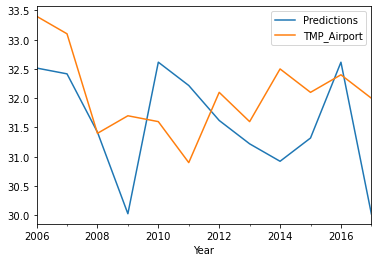

In [13]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['TMP_Airport'].plot(legend = True)
plt.show()

In [14]:
# Load specific evaluation tools before doing model evaluyation
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
# Calculate root mean squared error
print("Root Mean square Error is:",rmse(test["TMP_Airport"], predictions))
  
# Calculate mean squared error
print("Mean squared error is:",mean_squared_error(test["TMP_Airport"], predictions))

Root Mean square Error is: 1.089308742343126
Mean squared error is: 1.1865935361451627


In [15]:
#Forecast using ARIMA Model

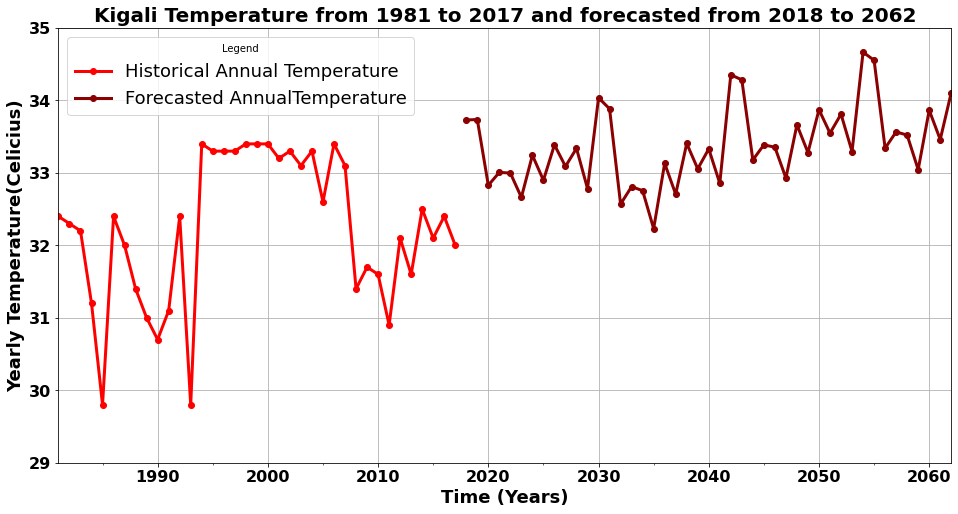

In [16]:
# Train the model on the full dataset
model = model = SARIMAX(data['TMP_Airport'], 
                        order = (1, 1, 0), 
                        seasonal_order =(1, 1, 0, 12))
result = model.fit()
  
# Forecast for the next 45 years
forecast = result.predict(start = len(data), 
                          end = (len(data)-1)+45, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
#plt.ylim(0,2000)
data['TMP_Airport'].plot(figsize = (16, 8),linewidth=3.0,marker="o",label='Historical Annual Temperature',color='red')
# z = np.arange(tmpgitega['Year'].size)
# fit = np.polyfit(z, tmpgitega['TMP_Gitega'], deg=1)
# fit_function = np.poly1d(fit)
# plt.plot(tmpgitega['Year'], fit_function(z),'--',color='tab:blue',linewidth=2.0,label='Temperature Trend')
forecast.plot(linewidth=3.0,fontsize=18,label='Forecasted AnnualTemperature',marker="o",color='#8B0000')
plt.xlabel('Time (Years)', fontsize=18,fontweight='bold')
plt.ylabel("Yearly Temperature(Celicius)",fontsize=18,fontweight='bold')
plt.ylim(29,35)
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.title('Kigali Temperature from 1981 to 2017 and forecasted from 2018 to 2062', fontsize=20,fontweight='bold')
plt.legend(title='Legend',fontsize=18,loc='upper left')
plt.grid()
plt.savefig('forecastedkglTMP1.png')
plt.show();

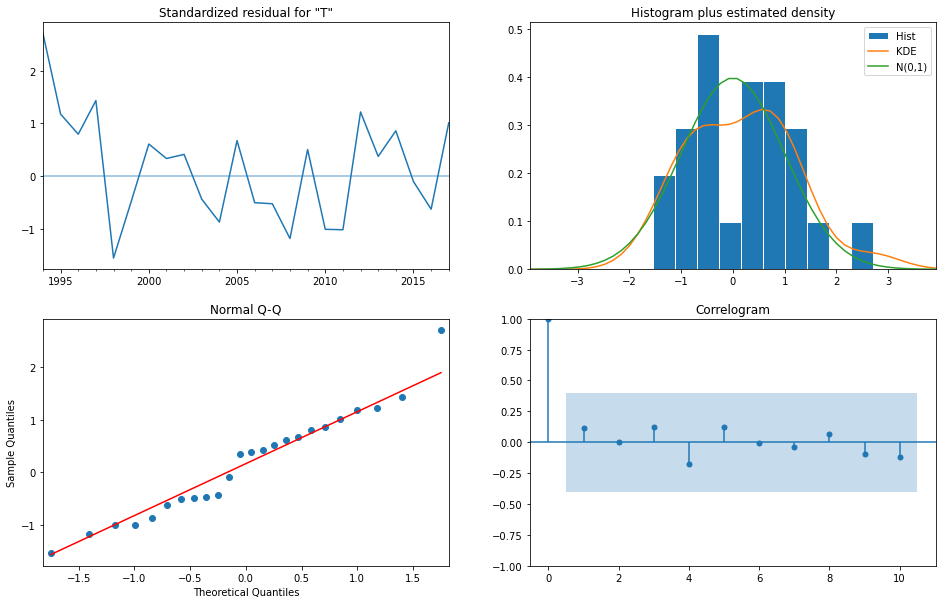

In [17]:
result.plot_diagnostics(figsize=(16, 10))
plt.show()

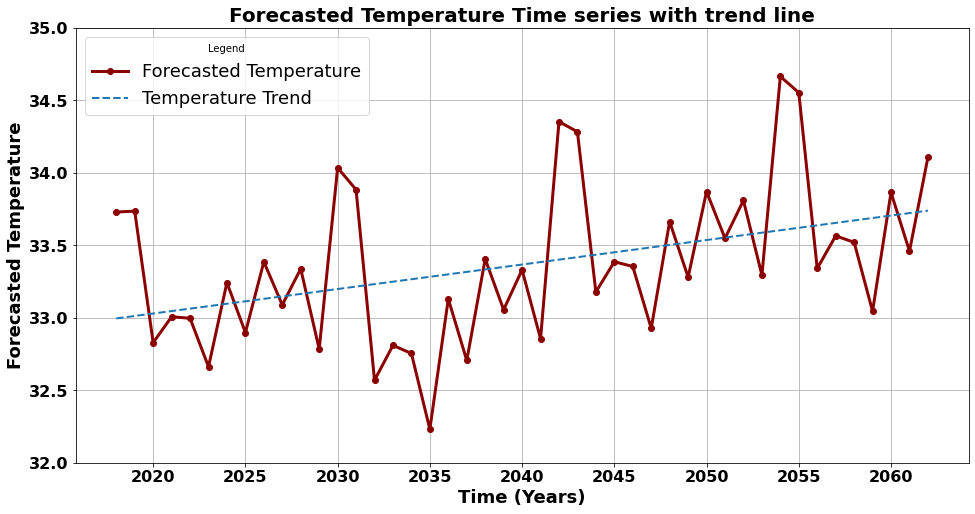

In [18]:
data1= pd.DataFrame(forecast)
dat=data1.rename_axis(index="Year")
z = np.arange(dat.index.size)
fit = np.polyfit(z, dat['Forecast'], deg=1)
plt.figure(figsize=(16,8))
plt.title('Forecasted Temperature Time series with trend line', fontsize=20,fontweight='bold')
plt.plot(dat.index,dat['Forecast'],color='#8B0000',marker='o',linewidth=3.0,label='Forecasted Temperature')
plt.grid(False)
fit_function = np.poly1d(fit)
plt.plot(dat.index,fit_function(z),'--',color='tab:blue',linewidth=2.0,label='Temperature Trend')
plt.xlabel('Time (Years)', fontsize=18,fontweight='bold')
plt.ylabel("Forecasted Temperature", fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold')
plt.ylim(32,35)
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(title='Legend',fontsize=18)
plt.grid()
plt.savefig('forecastedTMP.png')
plt.show()